In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import tables
import uproot

import pandas as pd
from mpl_toolkits.mplot3d import Axes3D


import matplotlib.cm as cm
from matplotlib.colors import Normalize

In [2]:
HitsInfo=uproot.open("/media/ilker/writable/QPIX_DATA/Proton_Decay.root")
voxelFile=uproot.open("/home/ilker/Desktop/UTA_Computer/Ilker/QPIX_Develop/Voxelsv2.root")

In [3]:
Event=1
MC_Xhit = HitsInfo["event_tree/hit_start_x"].array(library="np")[Event]
MC_Yhit = HitsInfo["event_tree/hit_start_y"].array(library="np")[Event]
MC_Zhit = HitsInfo["event_tree/hit_start_z"].array(library="np")[Event]
MC_Ehit = HitsInfo["event_tree/hit_energy_deposit"].array(library="np")[Event]
MC_Ihit = HitsInfo["event_tree/hit_start_t"].array(library="np")[Event]



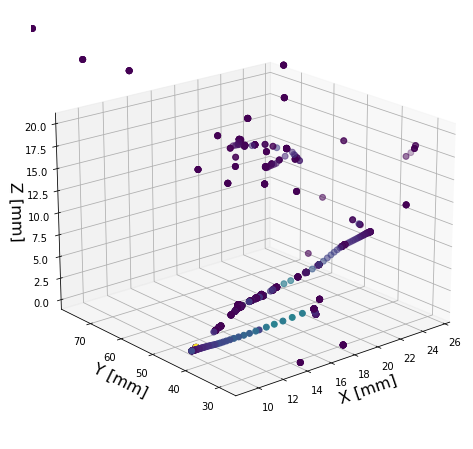

In [4]:
## Plot the MC truth
cmap = cm.viridis
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(MC_Xhit, MC_Yhit, MC_Zhit, c=MC_Ehit, s=35, cmap=cmap)

ax.set_xlabel('X [mm]',fontsize=16)
ax.set_ylabel('Y [mm]',fontsize=16)
ax.set_zlabel('Z [mm]',fontsize=16)
#plt.colorbar(sc)
#ax.set_xlim(60,100)
#ax.set_ylim(1050,1100)
#ax.set_zlim(-1150,-1060)

mx = np.mean(MC_Xhit)
sx = np.std(MC_Xhit)
ax.set_xlim(mx-1*sx,mx+1*sx)

mx = np.mean(MC_Yhit)
sx = np.std(MC_Yhit)
ax.set_ylim(mx-1*sx,mx+1*sx)

mx = np.mean(MC_Zhit)
sx = np.std(MC_Zhit)
ax.set_zlim(mx-1*sx,mx+1*sx)
#ax.set_ylim(1050,1100)
#ax.set_zlim(-1150,-1060)


ax.view_init(20, 230)
#ax.view_init(30, 130)

plt.show()

In [50]:
#Voxel_Info
Event=1
#voxelFile=uproot.open("/media/ilker/writable/UTA_Computer/Ilker/QPIX_Develop/Analysis/Voxels.root")
VoxeID=voxelFile["voxels/VoxelID"].array(library="np")[Event]
VX=voxelFile["voxels/x"].array(library="np")[Event]
VY=voxelFile["voxels/y"].array(library="np")[Event]
VZ=voxelFile["voxels/z"].array(library="np")[Event]
VQ=voxelFile["voxels/q"].array(library="np")[Event]

Reset_Mask = VQ>13*6250

VX = VX[Reset_Mask]
VY = VY[Reset_Mask]
VZ = VZ[Reset_Mask]
VQ = VQ[Reset_Mask]

In [51]:
len(VQ)

31

In [52]:
#Offset
VX=VX-min(VX)
VY=VY-min(VY)
VZ=VZ-min(VZ)
x_dim=int(max(VX))
y_dim=int(max(VY))
z_dim=int(max(VZ))

VOXELS = np.zeros((x_dim+1,y_dim+1,z_dim+1))

In [53]:
norm

In [54]:
# sort through the event set the "turn on" the hit voxels 
cmap = cm.viridis
cmap = cm.afmhot
# cmap = cm.Reds
# cmap = cm.coolwarm
# cmap = cm.bwr
norm = Normalize(vmin=0, vmax=max(VQ))
norm = Normalize(vmin=min(VQ), vmax=max(VQ))

colors = np.empty(VOXELS.shape, dtype=object)
for q in range(0,len(VZ)):
    VOXELS[int(VX[q])][int(VY[q])][int(VZ[q])] = 1
    colors[int(VX[q])][int(VY[q])][int(VZ[q])] = cmap(norm(VQ[q]))


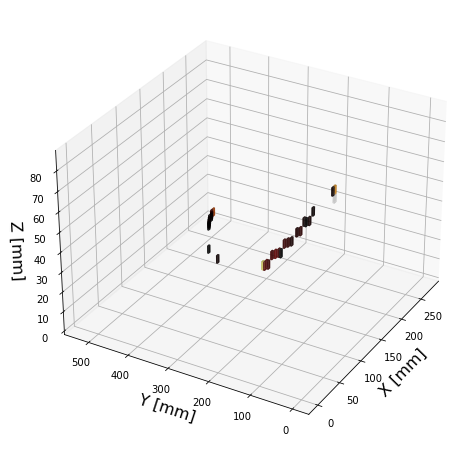

In [55]:
# and plot everything
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
#a,b,c is spacing in mm needs an extra dim
a,b,c = np.indices((x_dim+2,y_dim+2,z_dim+2))*4
# ax.voxels(a,b,c, VOXELS , facecolors=colors , edgecolor='k',alpha=0.2)

ax.voxels(a,b,c, VOXELS , facecolors=colors ,alpha=0.7)

ax.set_xlabel('X [mm]',fontsize=16)
ax.set_ylabel('Y [mm]',fontsize=16)
ax.set_zlabel('Z [mm]',fontsize=16)

# ax.set_xlim([0,200])
# ax.set_ylim([0,200])
# ax.set_zlim([0,200])

ax.view_init(30, 210)
#ax.view_init(10, 250)
# ax.view_init(20, 230)

plt.show()